In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
churn = pd.read_csv('C:/Users/AJ/Documents/Workspace/Churn_Train.csv')
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


The data needs to be treated by converting categorical variables into numerical variables

# Data Treatment


In [3]:
# for area_code column
area1 = churn[churn['area_code']=='area_code_510']
area1.loc[:, 'area_code'] = 510

area2 = churn[churn['area_code']=='area_code_415']
area2.loc[:, 'area_code'] = 415

area3 = churn[churn['area_code']=='area_code_408']
area3.loc[:, 'area_code'] = 408

nChurn1= pd.concat([area1, area2, area3])

# for international_plan column
interN = nChurn1[nChurn1['international_plan']=='no']
interN.loc[:, 'international_plan'] = 0

interY = nChurn1[nChurn1['international_plan']=='yes']
interY.loc[:, 'international_plan'] = 1

nChurn2= pd.concat([interN, interY])

# for voice_mail_plan column
voiceN = nChurn2[nChurn2['voice_mail_plan']=='no']
voiceN.loc[:, 'voice_mail_plan'] = 0

voiceY = nChurn2[nChurn2['voice_mail_plan']=='yes']
voiceY.loc[:, 'voice_mail_plan'] = 1

nChurn3= pd.concat([voiceN, voiceY])

# for churn column
churnN = nChurn3[nChurn3['churn']=='no']
churnN.loc[:, 'churn'] = 0

churnY = nChurn3[nChurn3['churn']=='yes']
churnY.loc[:, 'churn'] = 1

nChurn4= pd.concat([churnN, churnY])

nChurn4.head(10)    

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,510,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
13,ID,NaN,510,0,0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115,7.55,11.7,5.0,3.16,3.0,0
16,NY,65.0,510,0,0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105,8.03,8.9,4.0,2.40,0.0,0
27,FL,113.0,510,0,0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72,7.19,14.4,4.0,3.89,3.0,0
28,MD,73.0,510,0,0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60,6.90,10.6,8.0,2.86,0.0,0
35,NV,22.0,510,0,0,0.0,160.4,108.0,27.27,218.1,88.0,18.54,192.9,115,8.68,12.5,4.0,3.38,1.0,0
52,AK,52.0,510,0,0,0.0,148.3,83.0,25.21,181.6,79.0,15.44,155.6,104,7.00,8.3,6.0,2.24,3.0,0
57,SD,137.0,510,0,0,0.0,242.1,118.0,41.16,191.0,93.0,16.24,218.6,50,9.84,14.7,2.0,3.97,3.0,0
64,UT,164.0,510,0,0,0.0,192.1,95.0,32.66,249.8,94.0,21.23,132.6,100,5.97,7.3,3.0,1.97,3.0,0
70,NH,139.0,510,0,0,-8.0,221.3,140.0,37.62,157.8,89.0,13.41,192.5,89,8.66,11.3,6.0,3.05,1.0,0


In [5]:
nChurn4.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,2832.0,97.321328,47.874422,-209.00,72.00,100.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
international_plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
voice_mail_plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
number_vmail_messages,3133.0,7.332589,13.756056,-10.00,0.00,0.00,16.00,51.00
total_day_minutes,3133.0,418.947048,626.315020,0.00,149.30,190.50,237.80,2185.10
total_day_calls,3133.0,100.331631,20.039364,0.00,87.00,101.00,114.00,165.00
total_day_charge,3133.0,30.628455,9.275752,0.00,24.45,30.65,36.84,59.64
total_eve_minutes,3032.0,324.258872,320.129372,0.00,170.50,209.90,257.55,1244.20
total_eve_calls,3133.0,100.128631,19.899854,0.00,87.00,100.00,114.00,170.00


In [6]:
# checking for missing values
nChurn4.isnull().sum()

state                              0
account_length                   501
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            200
total_day_minutes                200
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64

Treating the missing values

In [7]:
churnF = nChurn4.interpolate(method='linear', limit_direction='forward')
churnF.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,510,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
13,ID,95.0,510,0,0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115,7.55,11.7,5.0,3.16,3.0,0
16,NY,65.0,510,0,0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105,8.03,8.9,4.0,2.40,0.0,0
27,FL,113.0,510,0,0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72,7.19,14.4,4.0,3.89,3.0,0
28,MD,73.0,510,0,0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60,6.90,10.6,8.0,2.86,0.0,0
35,NV,22.0,510,0,0,0.0,160.4,108.0,27.27,218.1,88.0,18.54,192.9,115,8.68,12.5,4.0,3.38,1.0,0
52,AK,52.0,510,0,0,0.0,148.3,83.0,25.21,181.6,79.0,15.44,155.6,104,7.00,8.3,6.0,2.24,3.0,0
57,SD,137.0,510,0,0,0.0,242.1,118.0,41.16,191.0,93.0,16.24,218.6,50,9.84,14.7,2.0,3.97,3.0,0
64,UT,164.0,510,0,0,0.0,192.1,95.0,32.66,249.8,94.0,21.23,132.6,100,5.97,7.3,3.0,1.97,3.0,0
70,NH,139.0,510,0,0,-8.0,221.3,140.0,37.62,157.8,89.0,13.41,192.5,89,8.66,11.3,6.0,3.05,1.0,0


In [9]:
# collcting the features we want to analyze

sChurn = churnF.loc[:, ['account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']]
sChurn.head(10)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,125.0,510,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
13,95.0,510,0,0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115,7.55,11.7,5.0,3.16,3.0,0
16,65.0,510,0,0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105,8.03,8.9,4.0,2.40,0.0,0
27,113.0,510,0,0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72,7.19,14.4,4.0,3.89,3.0,0
28,73.0,510,0,0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60,6.90,10.6,8.0,2.86,0.0,0
35,22.0,510,0,0,0.0,160.4,108.0,27.27,218.1,88.0,18.54,192.9,115,8.68,12.5,4.0,3.38,1.0,0
52,52.0,510,0,0,0.0,148.3,83.0,25.21,181.6,79.0,15.44,155.6,104,7.00,8.3,6.0,2.24,3.0,0
57,137.0,510,0,0,0.0,242.1,118.0,41.16,191.0,93.0,16.24,218.6,50,9.84,14.7,2.0,3.97,3.0,0
64,164.0,510,0,0,0.0,192.1,95.0,32.66,249.8,94.0,21.23,132.6,100,5.97,7.3,3.0,1.97,3.0,0
70,139.0,510,0,0,-8.0,221.3,140.0,37.62,157.8,89.0,13.41,192.5,89,8.66,11.3,6.0,3.05,1.0,0


In [19]:
# identifying and removing outliers

outliers = sChurn.values
x = outliers[:, :-1] 
y = outliers[:, -1]
print(x.shape, y.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(x)

# select all rows that are not outliers
outliers = [x for x in yhat if x != 1]
print('Identified outliers: ', len(outliers))

# assinging the dataset that are not outliers
mask = yhat != -1 # -1 means the row is an outlier
inputX = x[mask, :]
outputY = y[mask]

# summarize the shape of the updated dataset
print(inputX.shape, outputY.shape)

# fit the model
model = LogisticRegression()
model.fit(inputX, outputY)
print()

# evaluate predictions
mae = mean_absolute_error(y, yhat)
print('The mean absolute error (MAE) is: %.3f' % mae)

(3333, 18) (3333,)
Identified outliers:  31
(3302, 18) (3302,)

The mean absolute error (MAE) is: 0.859


In [20]:
# Collecting the data without outliers

xDf = pd.DataFrame(inputX)
yDf = pd.DataFrame(outputY)

oChurn = pd.concat([xDf, yDf], axis= 1)
oChurn.columns = ['account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']
oChurn

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,125.0,510.0,0.0,0.0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92.0,10.95,10.9,7.0,2.94,0.0,0.0
1,95.0,510.0,0.0,0.0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115.0,7.55,11.7,5.0,3.16,3.0,0.0
2,65.0,510.0,0.0,0.0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105.0,8.03,8.9,4.0,2.40,0.0,0.0
3,113.0,510.0,0.0,0.0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72.0,7.19,14.4,4.0,3.89,3.0,0.0
4,73.0,510.0,0.0,0.0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60.0,6.90,10.6,8.0,2.86,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,134.0,408.0,1.0,1.0,18.0,222.1,89.0,37.76,160.6,109.0,13.65,218.8,102.0,9.85,13.6,2.0,3.67,0.0,1.0
3298,135.0,408.0,1.0,1.0,41.0,173.1,85.0,29.43,203.9,107.0,17.33,122.2,78.0,5.50,14.6,15.0,3.94,0.0,1.0
3299,77.0,408.0,1.0,1.0,44.0,2087.8,117.0,17.54,1168.3,86.0,20.09,203.5,101.0,9.16,11.9,2.0,3.21,0.0,1.0
3300,95.0,408.0,1.0,1.0,37.0,220.2,109.0,37.43,185.3,99.0,15.75,205.1,82.0,9.23,4.1,2.0,1.11,0.0,1.0


In [22]:
# saving the data without outliers as a new dataset

oChurn.to_csv('churn_treated.csv')

In [23]:
oChurn.nunique()

account_length                    415
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              73
total_day_minutes                1909
total_day_calls                   176
total_day_charge                 1763
total_eve_minutes                2013
total_eve_calls                   170
total_eve_charge                 1517
total_night_minutes              1656
total_night_calls                 118
total_night_charge               1018
total_intl_minutes                245
total_intl_calls                   45
total_intl_charge                 287
number_customer_service_calls      23
churn                               2
dtype: int64

# Analyzing the distribution of the data

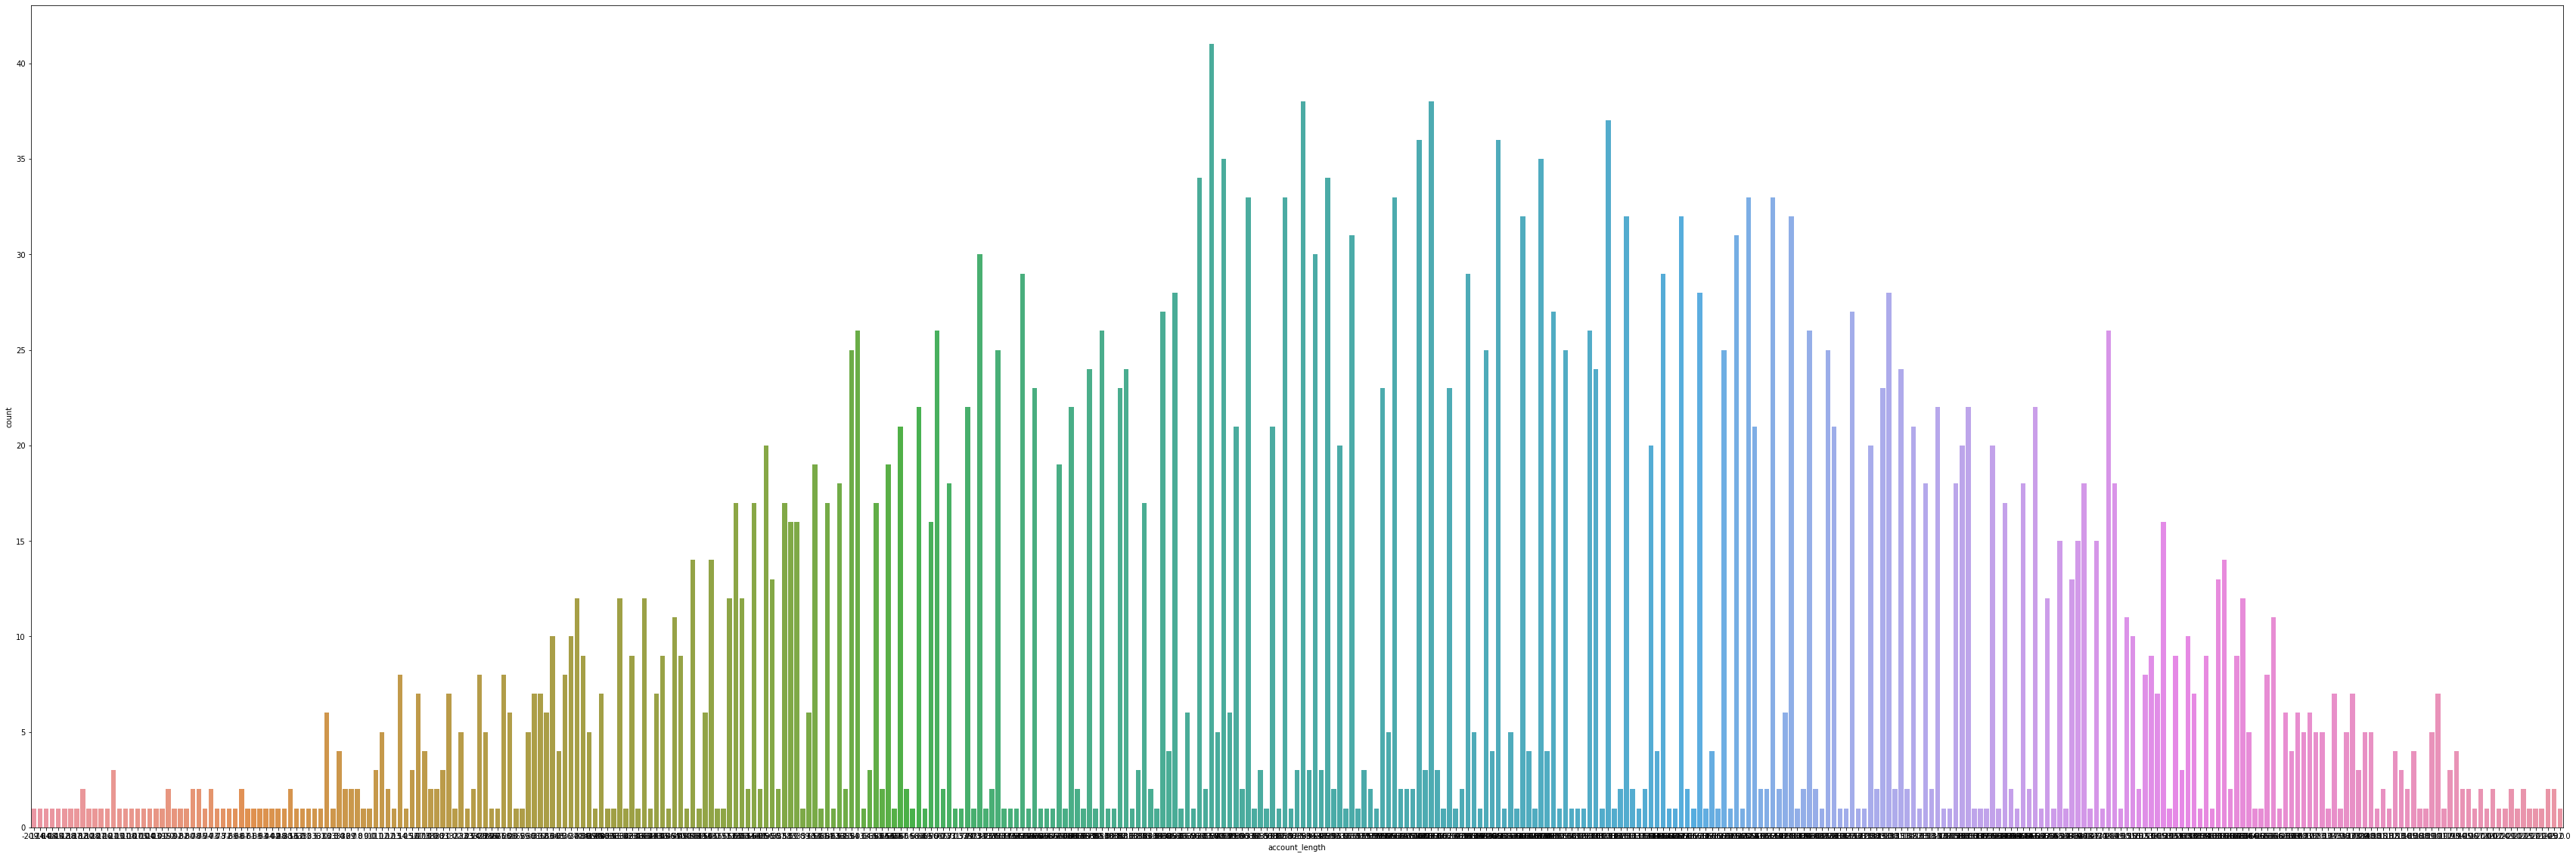

In [26]:
age = sns.countplot(x='account_length', data=oChurn)
plt.gcf().set_size_inches(60,20)
plt.show()

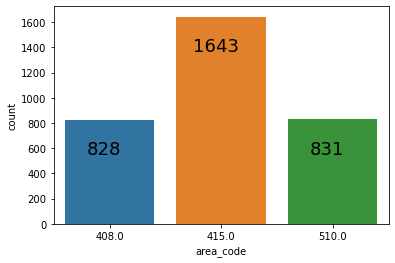

415.0    49.757723
510.0    25.166566
408.0    25.075712
Name: area_code, dtype: float64


In [35]:
age = sns.countplot(x='area_code', data=oChurn)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(oChurn['area_code'].value_counts(normalize=True)*100)

49.76% of customers live in area code 415, while 25.17 and 25.08 live in area codes 510 and 408 respectively 

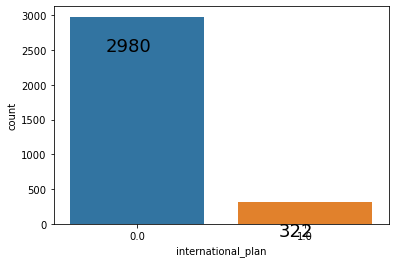

0.0    90.248334
1.0     9.751666
Name: international_plan, dtype: float64


In [36]:
age = sns.countplot(x='international_plan', data=oChurn)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(oChurn['international_plan'].value_counts(normalize=True)*100)

90.25% of customers do not have an international plan

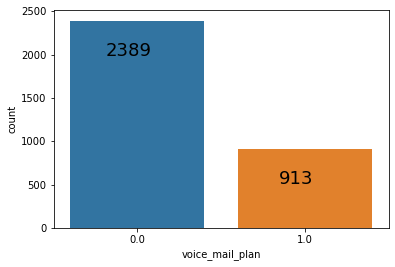

0.0    72.350091
1.0    27.649909
Name: voice_mail_plan, dtype: float64


In [38]:
age = sns.countplot(x='voice_mail_plan', data=oChurn)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(oChurn['voice_mail_plan'].value_counts(normalize=True)*100)

72.35% of customers do not have a voice mail plan

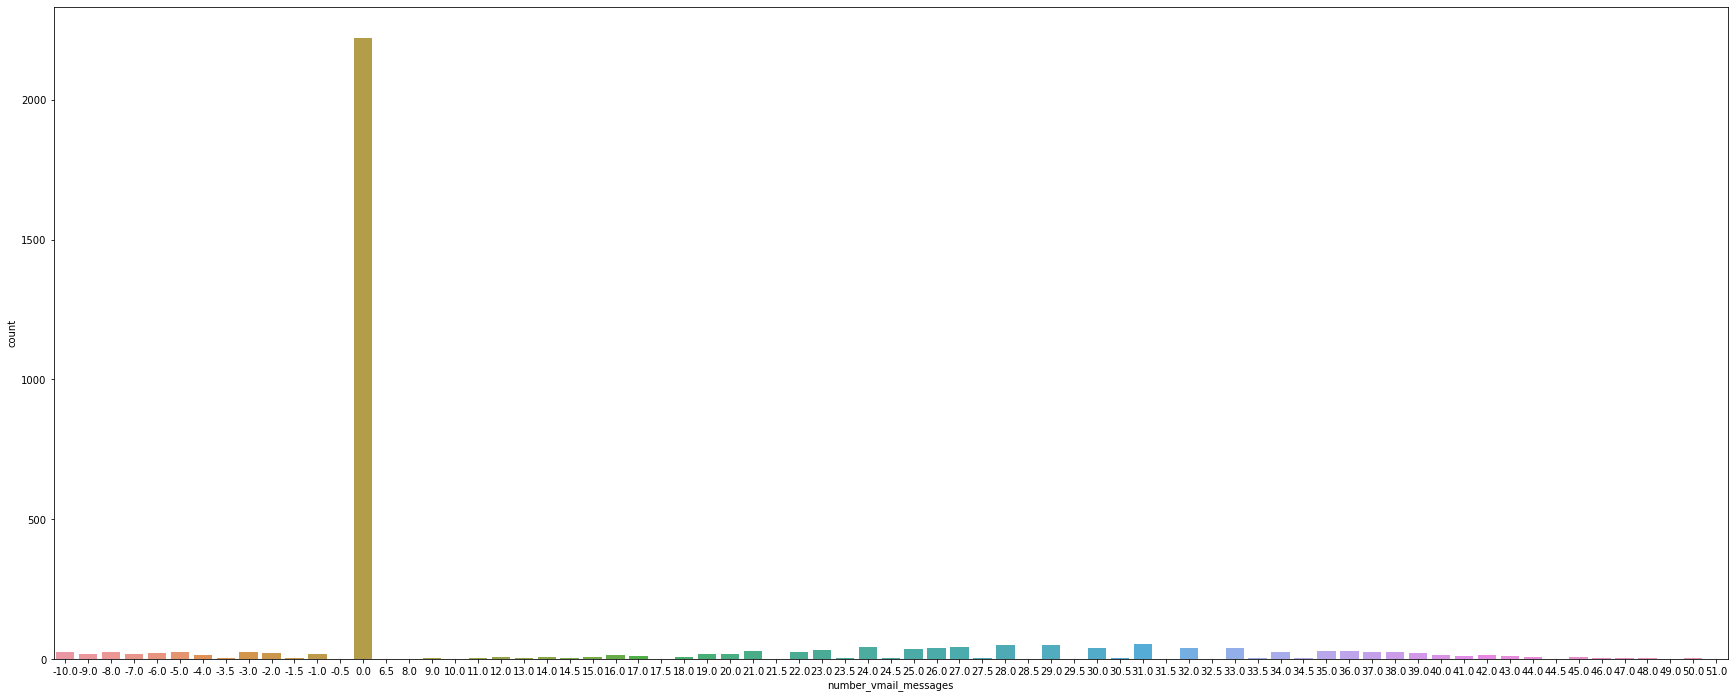

0.0     67.292550
31.0     1.635373
29.0     1.453664
28.0     1.453664
24.0     1.241672
          ...    
17.5     0.030285
29.5     0.030285
49.0     0.030285
28.5     0.030285
31.5     0.030285
Name: number_vmail_messages, Length: 73, dtype: float64


In [40]:
age = sns.countplot(x='number_vmail_messages', data=oChurn)
plt.gcf().set_size_inches(30,12)
plt.show()
print(oChurn['number_vmail_messages'].value_counts(normalize=True)*100)

67.29% of customers do not have any voice messages

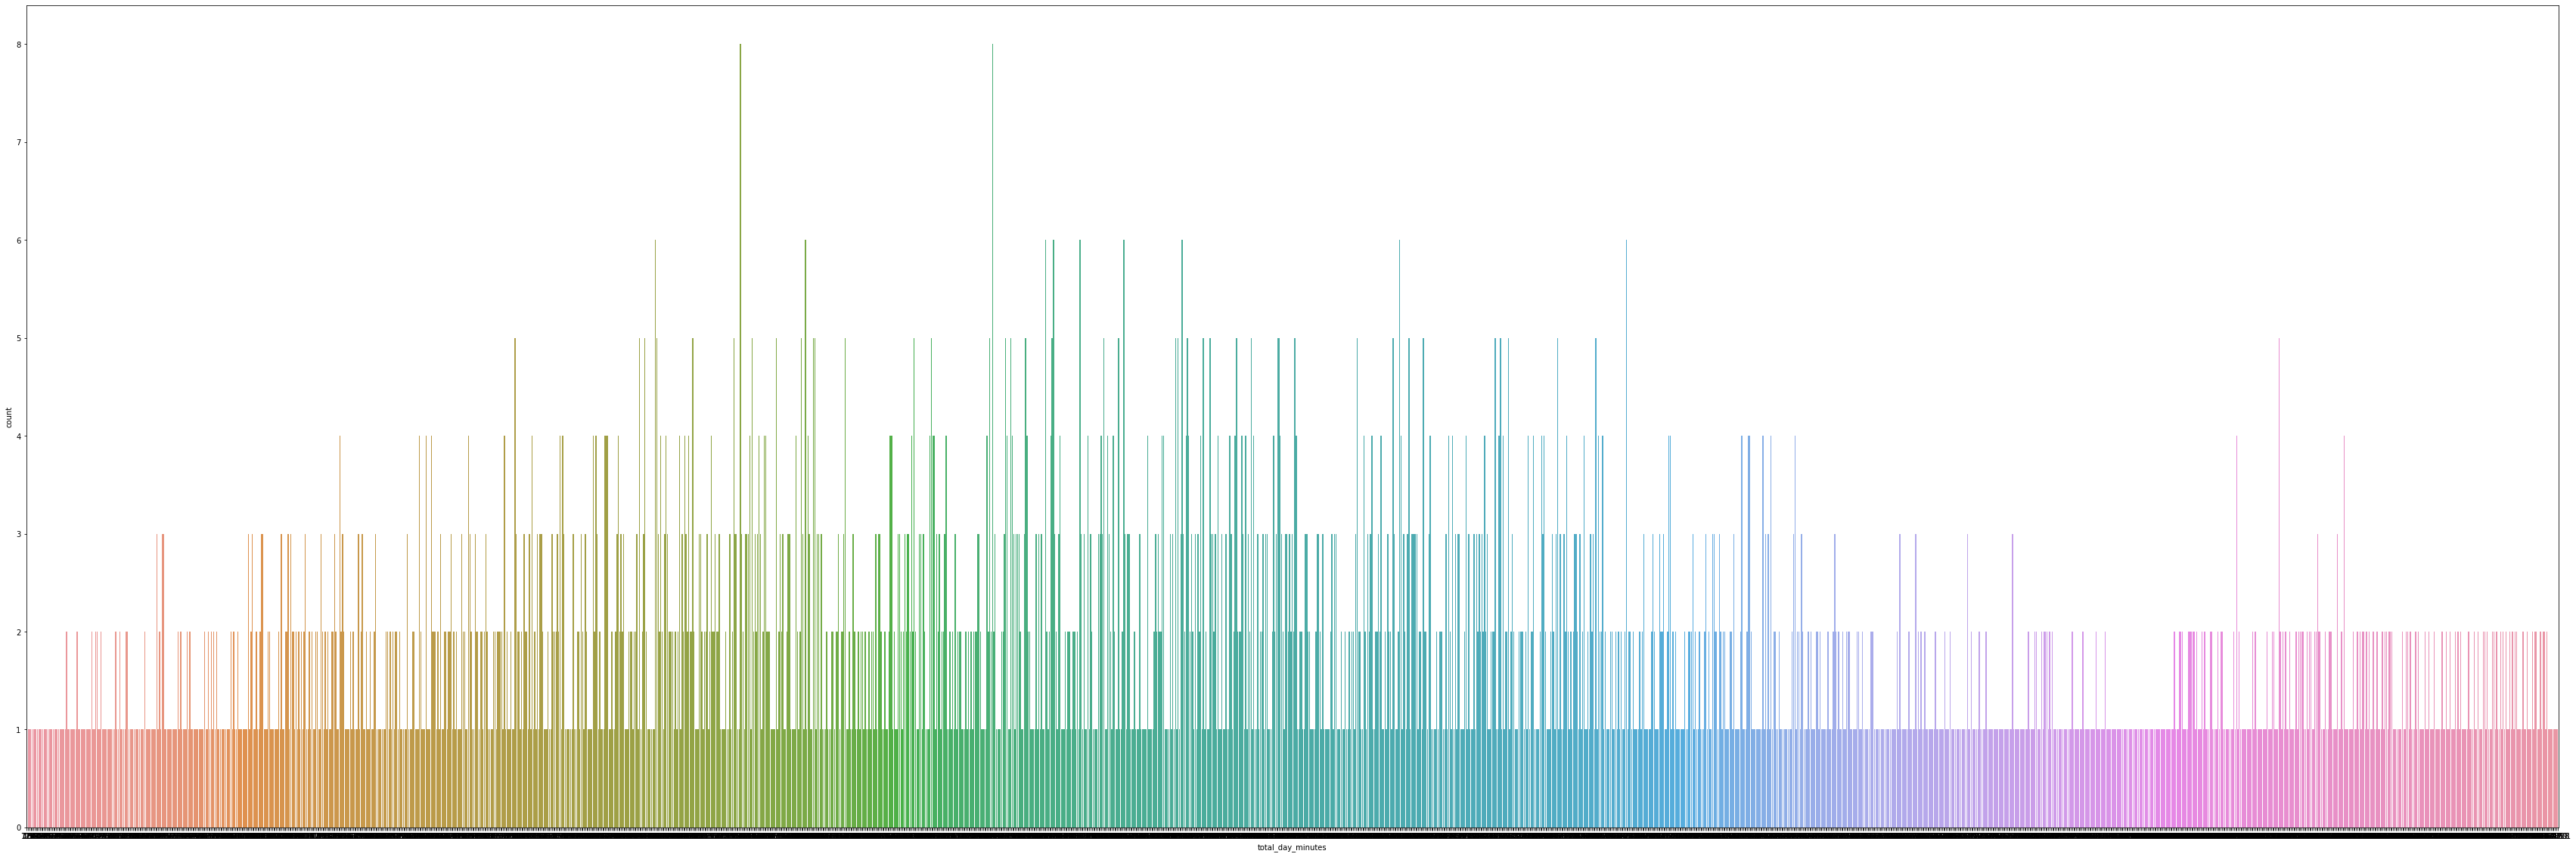

In [41]:
age = sns.countplot(x='total_day_minutes', data=oChurn)
plt.gcf().set_size_inches(60,20)
plt.show()

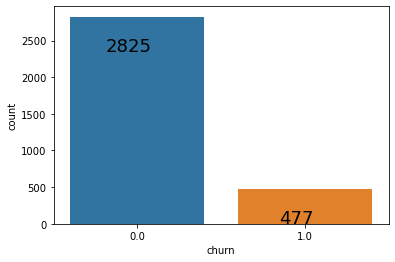

0.0    85.55421
1.0    14.44579
Name: churn, dtype: float64


In [43]:
age = sns.countplot(x='churn', data=oChurn)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=18)
plt.show()
print(oChurn['churn'].value_counts(normalize=True)*100)

- 85.55% of customers do not churn out
- while 14.45% of customers do churn out

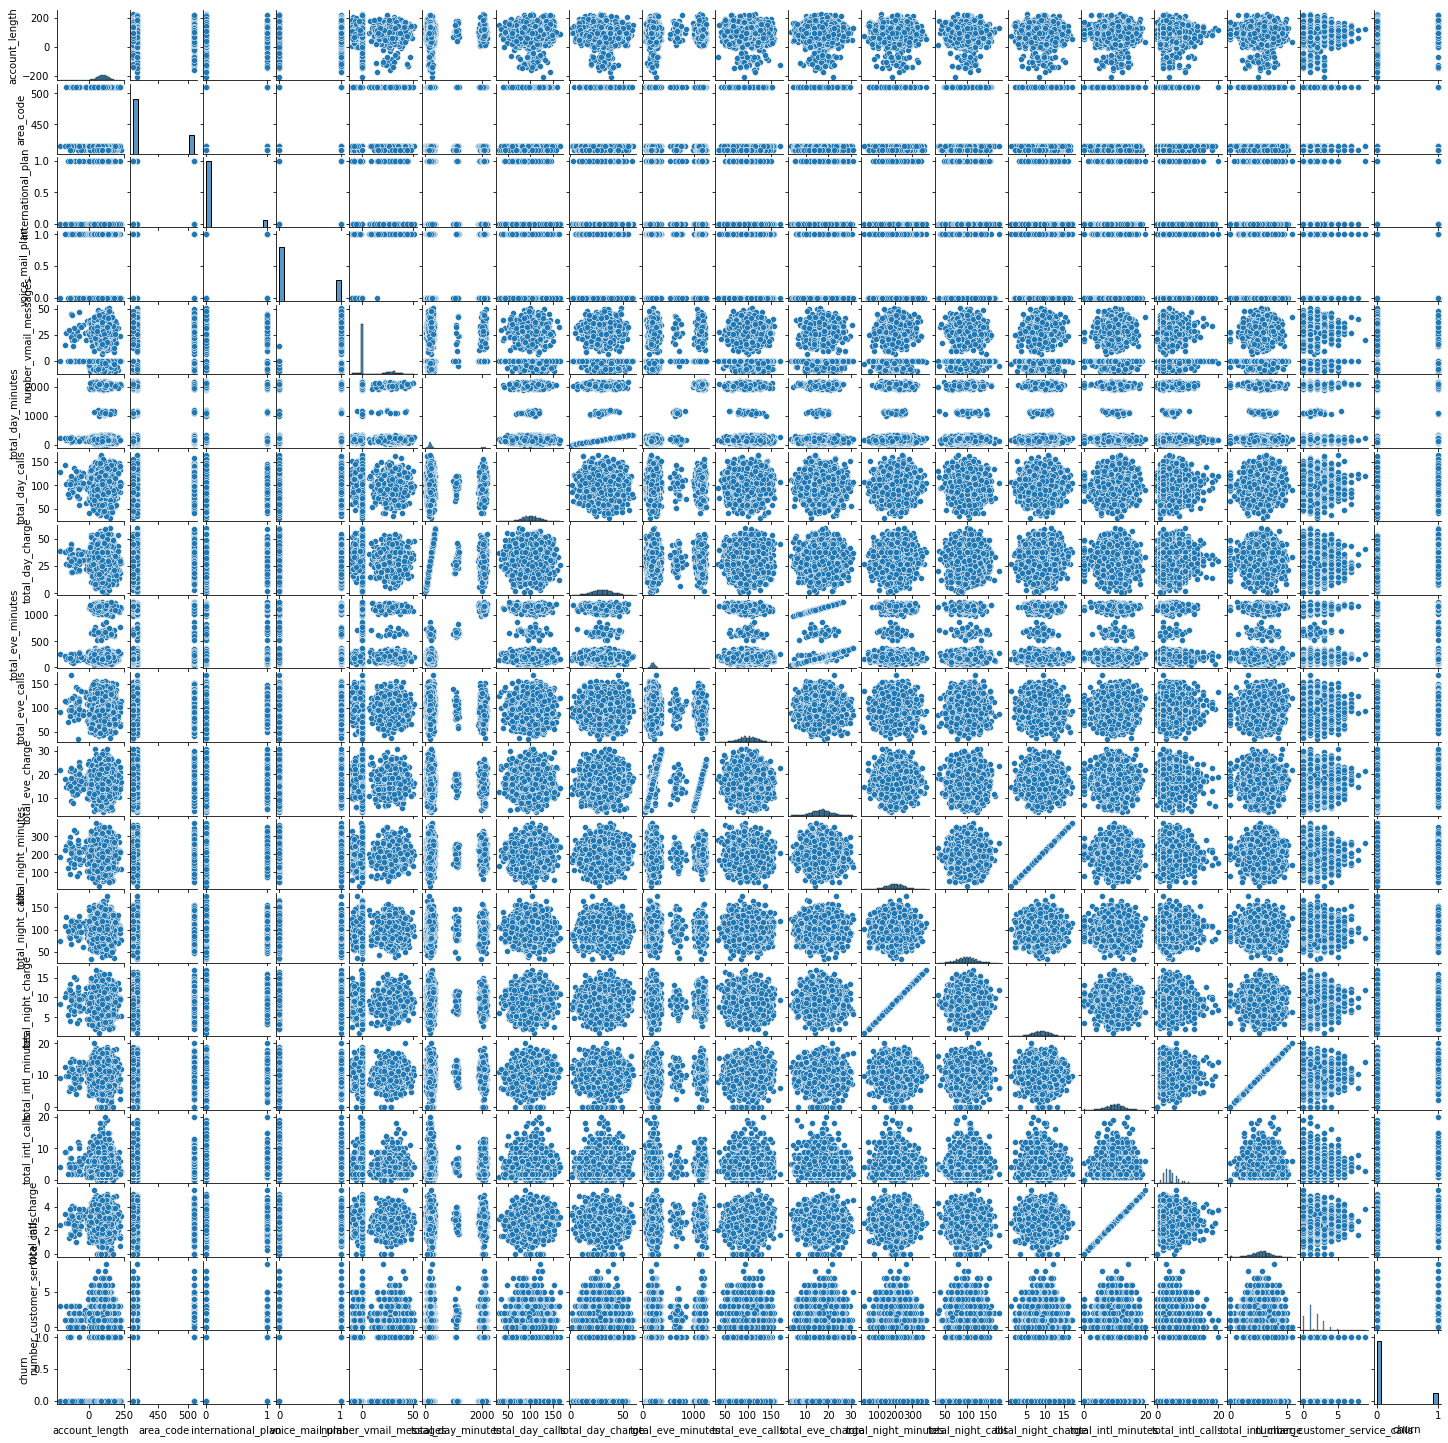

In [47]:
sns.pairplot(oChurn)
plt.gcf().set_size_inches(20,20)

<AxesSubplot:>

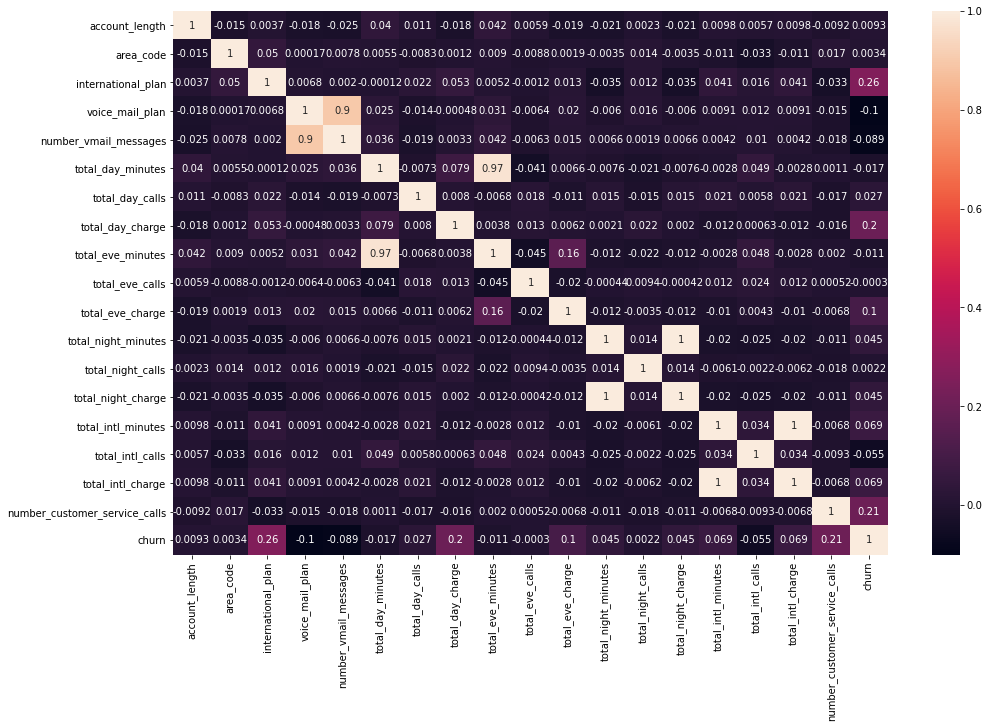

In [46]:
set_option('display.width', 100)
plt.figure(figsize=(16,10))
sns.heatmap(oChurn.corr(), annot=True)

<Figure size 576x360 with 0 Axes>

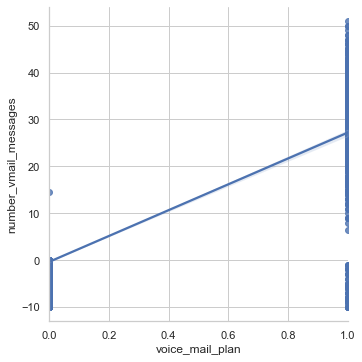

<Figure size 576x360 with 0 Axes>

In [49]:
sns.set(style="whitegrid")
agethalach = sns.lmplot(x="voice_mail_plan", y="number_vmail_messages" , data=oChurn)
plt.figure(figsize = (8,5))

This means that as the number of voice mail messages increases, the voice mail plan also increases

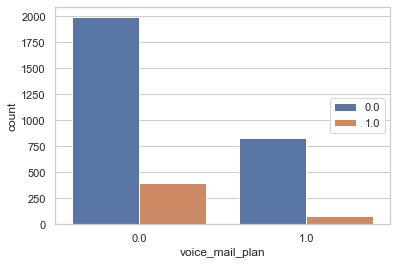

In [52]:
sns.countplot(x="voice_mail_plan", hue="churn", data=oChurn)
plt.legend(loc='right')

More customers without a voice mail plan tend to leave more

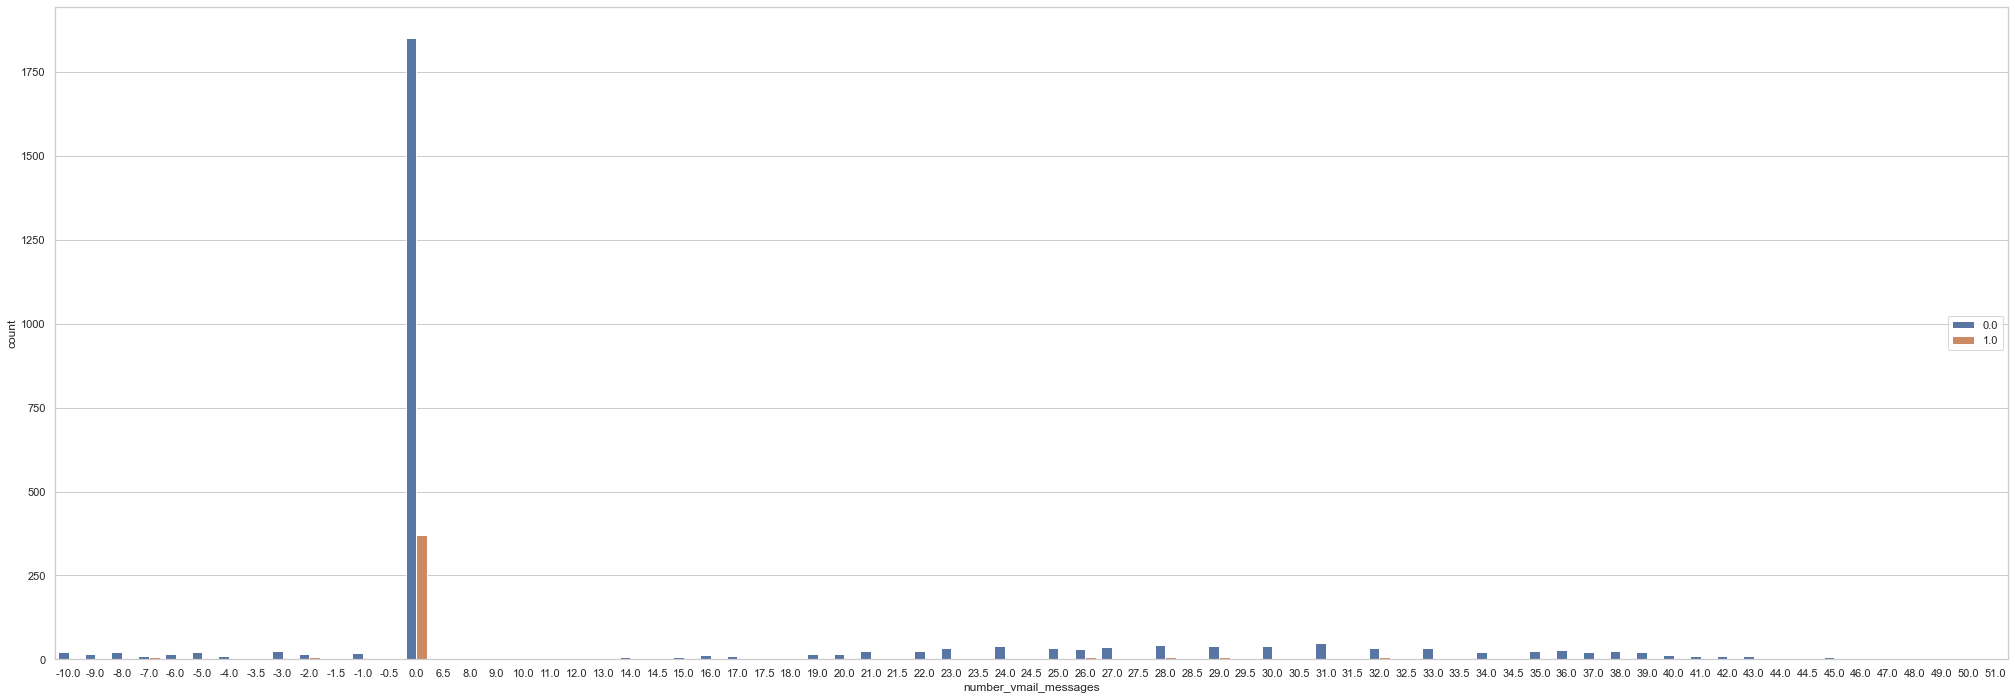

In [54]:
sns.countplot(x="number_vmail_messages", hue="churn", data=oChurn)
plt.gcf().set_size_inches(35,12)
plt.legend(loc='right')

People without any voicemail messages leave the most

<Figure size 576x360 with 0 Axes>

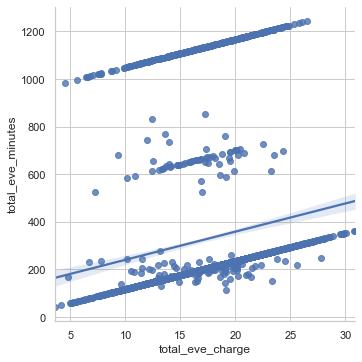

<Figure size 576x360 with 0 Axes>

In [55]:
sns.set(style="whitegrid")
agethalach = sns.lmplot(x="total_eve_charge", y="total_eve_minutes" , data=oChurn)
plt.figure(figsize = (8,5))

As the minutes spent on evening charges increses, so does the charges

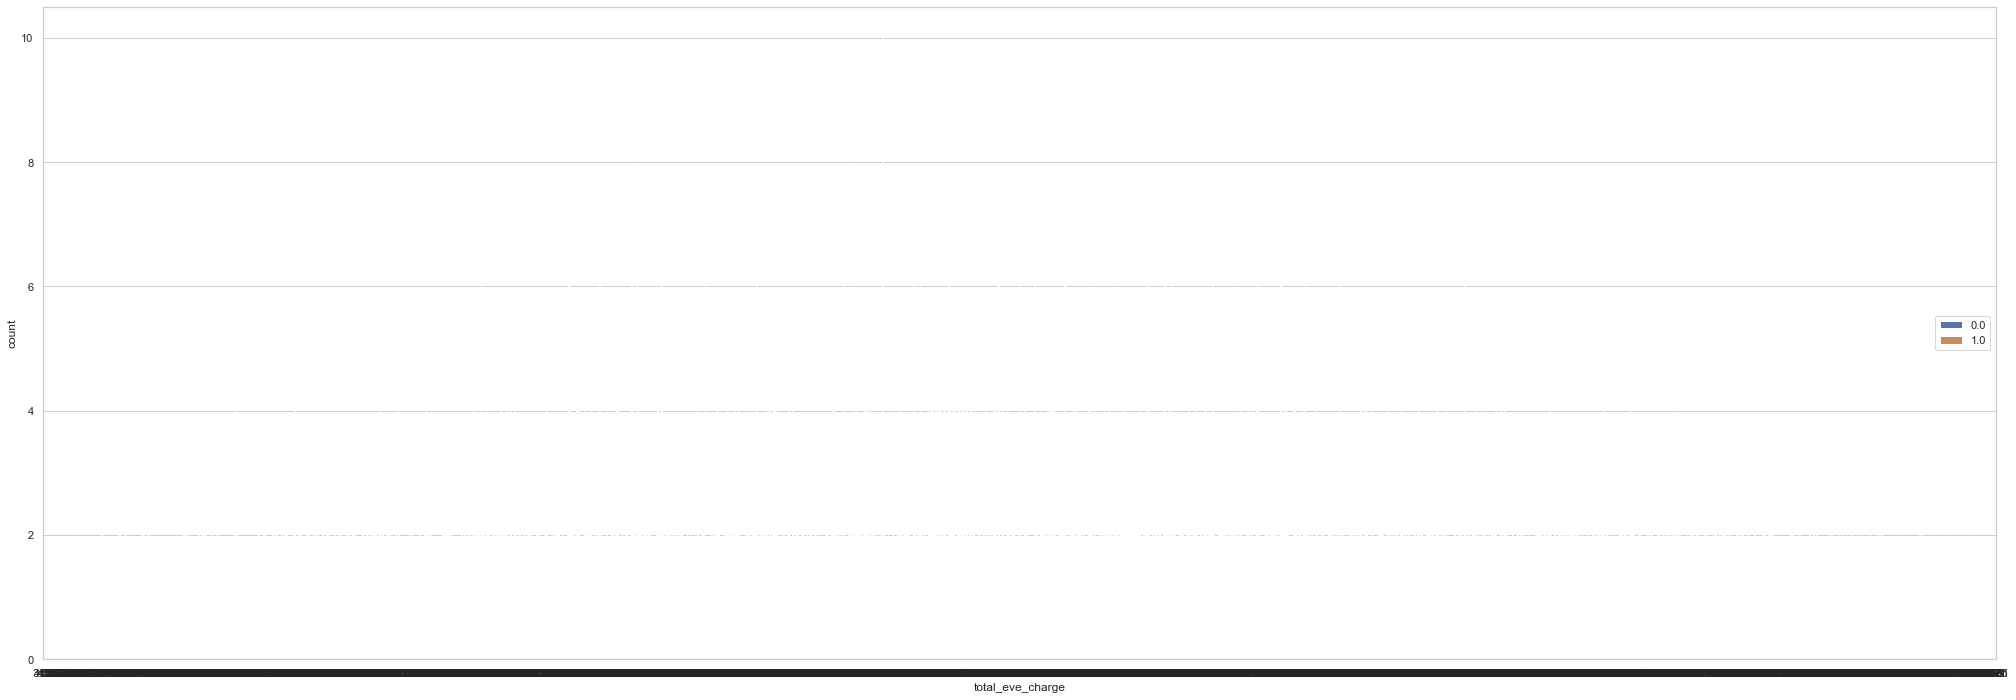

In [56]:
sns.countplot(x="total_eve_charge", hue="churn", data=oChurn)
plt.gcf().set_size_inches(35,12)
plt.legend(loc='right')

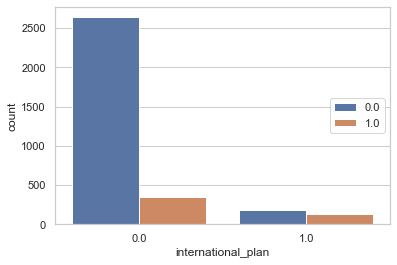

In [58]:
sns.countplot(x="international_plan", hue="churn", data=oChurn)
plt.legend(loc='right')

Although the number of customers without international plan are leaving the most, almost all who have an international plan have left

In [ ]:
sns.countplot(x="total_day_charge", hue="churn", data=oChurn)
plt.legend(loc='right')

In [ ]:
sns.countplot(x="total_eve_charge", hue="churn", data=oChurn)
plt.legend(loc='right')

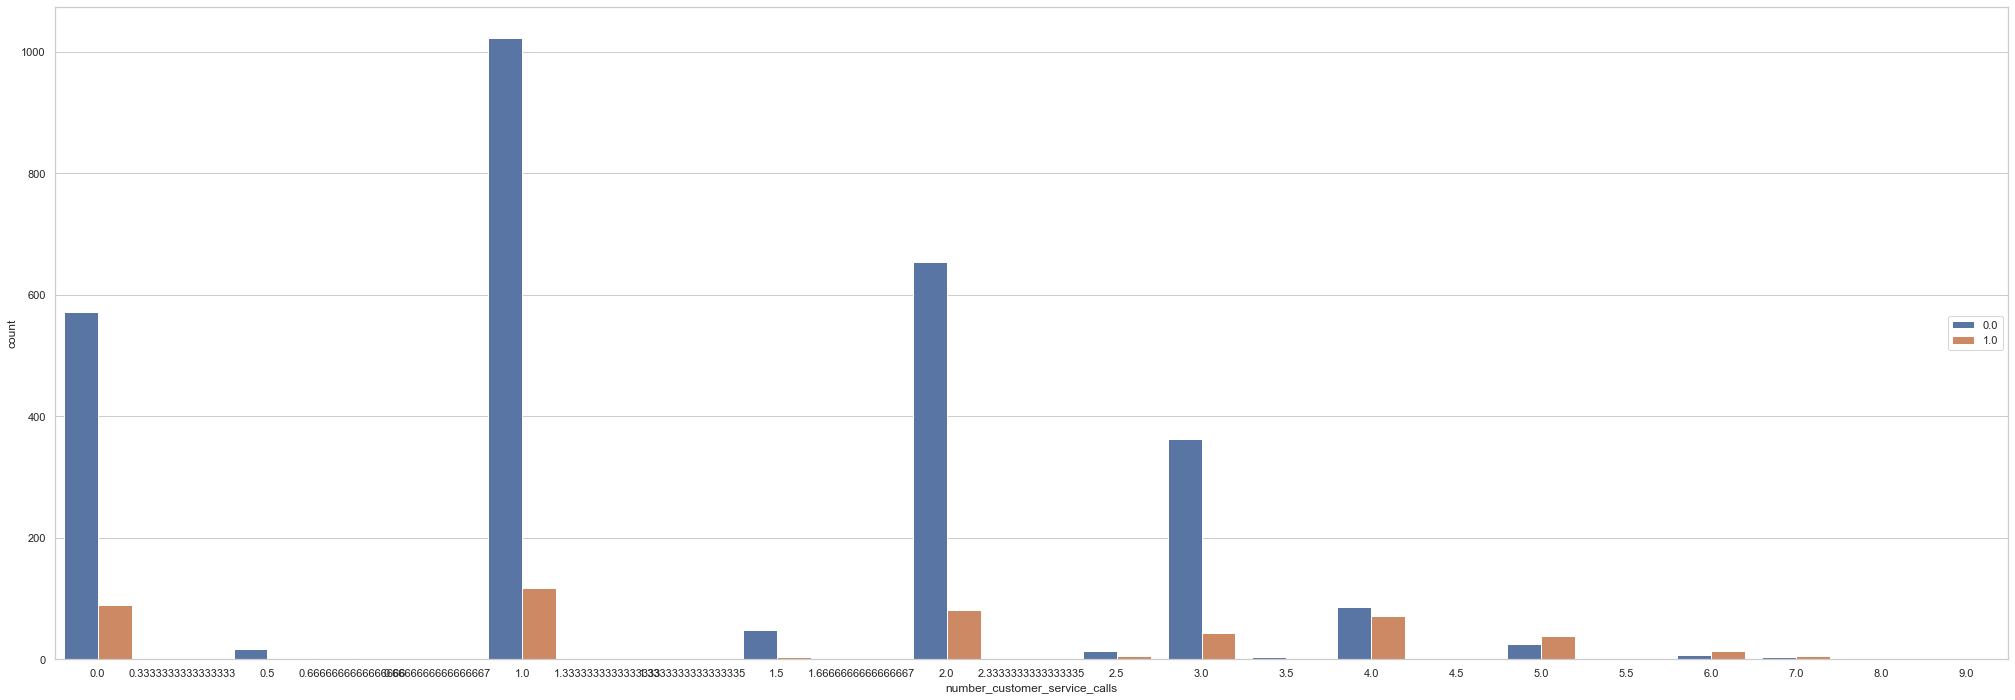

In [60]:
sns.countplot(x="number_customer_service_calls", hue="churn", data=oChurn)
plt.gcf().set_size_inches(35,12)
plt.legend(loc='right')

Customers who have made service calls above 4.0 times have left at a more efficient rate